17th c  Nn Relu Sigmoid

Epoch 0, Loss: 0.1538
Epoch 100, Loss: 0.0233
Epoch 200, Loss: 0.0143
Epoch 300, Loss: 0.0115
Epoch 400, Loss: 0.0100
Epoch 500, Loss: 0.0090
Epoch 600, Loss: 0.0082
Epoch 700, Loss: 0.0075
Epoch 800, Loss: 0.0070
Epoch 900, Loss: 0.0053


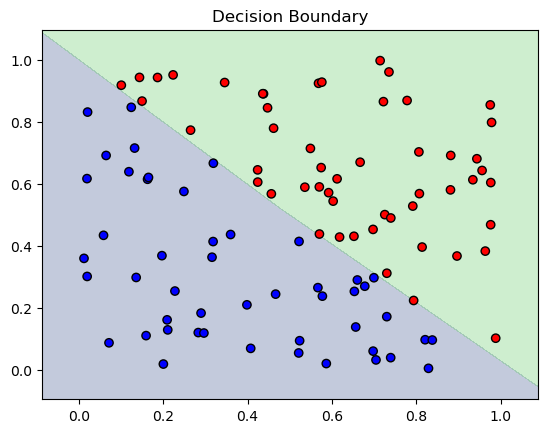

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Mean Squared Error loss and derivative
def mse_loss(y_true, y_pred):
    return np.mean(0.5 * (y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return y_pred - y_true

# Generate a toy dataset
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y_true = (X[:, 0] + X[:, 1] > 1).astype(float).reshape(-1, 1)  # Simple classification

# Initialize network parameters
input_size = 2
hidden_size = 3
output_size = 1
learning_rate = 0.1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training loop
num_epochs = 1000
use_relu = True  # Set to False for Sigmoid

for epoch in range(num_epochs):
    # Forward pass
    Z1 = X @ W1 + b1
    A1 = relu(Z1) if use_relu else sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    y_pred = sigmoid(Z2)  # Output layer uses sigmoid
    
    # Compute loss
    loss = mse_loss(y_true, y_pred)
    
    # Backward pass
    dL_dy = mse_loss_derivative(y_true, y_pred) * sigmoid_derivative(Z2)
    dL_dW2 = A1.T @ dL_dy
    dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)
    
    dA1 = dL_dy @ W2.T
    dZ1 = dA1 * (relu_derivative(Z1) if use_relu else sigmoid_derivative(Z1))
    dL_dW1 = X.T @ dZ1
    dL_db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    # Update weights
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Plot decision boundary
def plot_decision_boundary(X, y, W1, b1, W2, b2, use_relu=True):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    Z1 = grid @ W1 + b1
    A1 = relu(Z1) if use_relu else sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    preds = sigmoid(Z2).reshape(xx.shape)
    
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), edgecolors='k', cmap='bwr')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X, y_true, W1, b1, W2, b2, use_relu)
